In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('2019_hdb_dataset_with_mrt_schools_sm.csv')
# df = df.drop(columns = ['Unnamed: 0','Latitude','Longtitude','Year','address','nearest_mrt','nearest_primary_school','nearest_secondary_school','nearest_JC/MI','nearest_mixed_level','nearest_sm','Postal','remaining_lease','full_address'])
df = df.drop(columns = ['Unnamed: 0','Year','address','Postal','full_address'])
df['remaining_lease'] = 99 - (2019 - df['lease_commence_date'])

In [3]:
df['town'].unique()
df['town_region'] = df['town'].map({'ANG MO KIO':'North_East',
                             'BEDOK': 'East',
                             'BISHAN':'Central',
                             'BUKIT BATOK':'West',
                             'BUKIT MERAH':'Central',                 
                             'BUKIT PANJANG':'West',
                             'BUKIT TIMAH':'Central',
                             'CENTRAL AREA':'Central',
                             'CHOA CHU KANG':'West',
                             'CLEMENTI':'West',
                             'GEYLANG':'Central',
                             'HOUGANG':'North_East',
                             'JURONG EAST':'West',
                             'JURONG WEST':'West',
                             'KALLANG/WHAMPOA':'Central',
                             'MARINE PARADE':'Central',
                             'PASIR RIS': 'East',
                             'PUNGGOL':'North_East',
                             'QUEENSTOWN':'Central',
                             'SEMBAWANG': 'North',
                             'SENGKANG':'North_East',
                             'SERANGOON':'North_East',
                             'TAMPINES': 'East',
                             'TOA PAYOH':'Central',
                             'WOODLANDS': 'North',
                             'YISHUN': 'North'})
# df['town_region_encoded'] = df['town_region'].map({'West':1,'North':2, 'North_East':3,'East':4,'Central':5})

df['storey_range'].unique()
df['storey_range_encoded'] = df['storey_range'].map({
                                        '10 TO 12':1,
                                        '01 TO 03':2,
                                        '04 TO 06':3,
                                        '07 TO 09':4,
                                        '13 TO 15':5,
                                        '19 TO 21':6,
                                        '22 TO 24':7,
                                        '16 TO 18':8,
                                        '34 TO 36':9,
                                        '28 TO 30':10,
                                        '37 TO 39':11,
                                        '49 TO 51':12,
                                        '25 TO 27':13,
                                        '40 TO 42':14,
                                        '31 TO 33':15,
                                        '46 TO 48':16,
                                        '43 TO 45':17})
df['flat_type'].unique()
df['flat_type_encoded'] = df['flat_type'].map({
                                    '1 ROOM':1,
                                    '2 ROOM':2,
                                    '3 ROOM':3,
                                    '4 ROOM':4,
                                    '5 ROOM':5,
                                    'EXECUTIVE':6,
                                    'MULTI-GENERATION':7})

In [5]:
pd.options.display.max_columns = None
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Latitude,Longtitude,nearest_mrt,nearest_mrt_distance(km),nearest_primary_school,nearest_primary_school(km),nearest_secondary_school,nearest_secondary_school(km),nearest_JC/MI,nearest_JC/MI(km),nearest_mixed_level,nearest_mixed_level(km),nearest_sm,nearest_sm_distance(km),town_region,storey_range_encoded,flat_type_encoded
0,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,61,270000.0,1.362432,103.851031,ANG MO KIO MRT STATION,0.845591,TECK GHEE PRIMARY SCHOOL,0.355873,DEYI SECONDARY SCHOOL,0.552798,EUNOIA JUNIOR COLLEGE,1.173726,CATHOLIC HIGH SCHOOL,1.083775,G8 MART PTE. LTD.,0.391164,North_East,2,3
1,ANG MO KIO,3 ROOM,04 TO 06,73.0,New Generation,1976,56,295000.0,1.366558,103.841624,ANG MO KIO MRT STATION,0.958109,ANG MO KIO PRIMARY SCHOOL,0.401382,ANG MO KIO SECONDARY SCHOOL,0.140156,EUNOIA JUNIOR COLLEGE,0.471203,CHIJ ST. NICHOLAS GIRLS' SCHOOL,1.136466,NTUC Fairprice Co-operative Ltd,0.000000,North_East,3,3
2,ANG MO KIO,3 ROOM,07 TO 09,67.0,New Generation,1978,58,270000.0,1.367396,103.838150,ANG MO KIO MRT STATION,1.299709,ANG MO KIO PRIMARY SCHOOL,0.212151,MAYFLOWER SECONDARY SCHOOL,0.319176,EUNOIA JUNIOR COLLEGE,0.605035,CHIJ ST. NICHOLAS GIRLS' SCHOOL,0.820483,SHENG SIONG SUPERMARKET PTE LTD,0.157761,North_East,4,3
3,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,58,230000.0,1.367396,103.838150,ANG MO KIO MRT STATION,1.299709,ANG MO KIO PRIMARY SCHOOL,0.212151,MAYFLOWER SECONDARY SCHOOL,0.319176,EUNOIA JUNIOR COLLEGE,0.605035,CHIJ ST. NICHOLAS GIRLS' SCHOOL,0.820483,SHENG SIONG SUPERMARKET PTE LTD,0.157761,North_East,2,3
4,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,61,262500.0,1.361343,103.851699,ANG MO KIO MRT STATION,0.979445,TOWNSVILLE PRIMARY SCHOOL,0.297218,DEYI SECONDARY SCHOOL,0.664513,EUNOIA JUNIOR COLLEGE,1.254093,CATHOLIC HIGH SCHOOL,1.044928,G8 MART PTE. LTD.,0.468670,North_East,2,3


In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['resale_price'].describe()

count     22186.000
mean     432137.913
std      153975.686
min      150000.000
25%      320000.000
50%      400000.000
75%      510000.000
max     1205000.000
Name: resale_price, dtype: float64

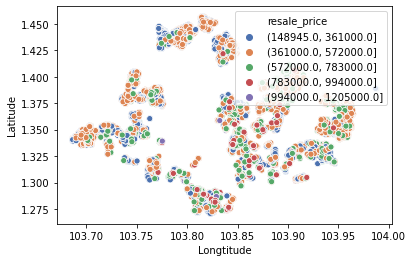

In [7]:
sns.scatterplot(data=df, x="Longtitude", y="Latitude", hue=pd.cut(df['resale_price'], bins=5)
, palette="deep")


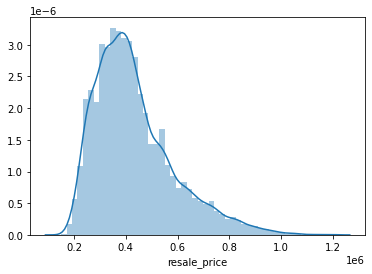

In [8]:
sns.distplot(df['resale_price']);


In [9]:
#skewness and kurtosis
print("Skewness: %f" % df['resale_price'].skew())
print("Kurtosis: %f" % df['resale_price'].kurt())

Skewness: 1.103113
Kurtosis: 1.281708


# relationship between resale_price to numerical features

In [10]:
#scatter plot var/resale_price

# var = 'floor_area_sqm'
# var = 'nearest_mrt_distance(km)'
# var = 'remaining_lease'
# var = 'nearest_primary_school(km)'
# var = 'nearest_secondary_school(km)'
# var = 'nearest_JC/MI(km)'
# var = 'nearest_mixed_level(km)'
# # var = 'nearest_sm_distance(km)'

# data = pd.concat([df['resale_price'], df[var]], axis=1)
# data.plot.scatter(x=var, y='resale_price', ylim=(0,1500000));

# relationship between resale_price and categorical features

In [11]:
#box plot overallqual/saleprice
# var = 'town'
# var = 'flat_type'
# var = 'storey_range'
# var = 'flat_model'
# var = 'nearest_mrt'
# var = 'nearest_primary_school'
# var = 'nearest_secondary_school'
# var = 'nearest_JC/MI'
# var = 'nearest_mixed_level'
# # var = 'nearest_sm'
# var = 'town_region'

# data = pd.concat([df['resale_price'], df[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="resale_price", data=df)
# fig.axis(ymin=0, ymax=1500000);

In [12]:
# df['flat_type'].unique()

In [13]:


# var = 'lease_commence_date'
# data = pd.concat([df['resale_price'], df[var]], axis=1)
# f, ax = plt.subplots(figsize=(16, 8))
# fig = sns.boxplot(x=var, y="resale_price", data=data)
# fig.axis(ymin=0, ymax=1500000);
# plt.xticks(rotation=90);

In [14]:
# plt.hist(df['resale_price'])

In [15]:
# df.hist()
# plt.tight_layout()

In [16]:
# sns.pairplot(df)

In [17]:
df.corr()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,Latitude,Longtitude,nearest_mrt_distance(km),nearest_primary_school(km),nearest_secondary_school(km),nearest_JC/MI(km),nearest_mixed_level(km),nearest_sm_distance(km),storey_range_encoded,flat_type_encoded
floor_area_sqm,1.000,0.146,0.146,0.635,0.155,-0.048,-0.000,-0.080,-0.108,0.055,0.118,0.037,0.006,0.954
lease_commence_date,0.146,1.000,1.000,0.315,0.389,0.005,-0.137,-0.152,-0.037,0.290,0.422,-0.116,0.219,0.203
remaining_lease,0.146,1.000,1.000,0.315,0.389,0.005,-0.137,-0.152,-0.037,0.290,0.422,-0.116,0.219,0.203
resale_price,0.635,0.315,0.315,1.000,-0.243,0.127,-0.159,0.022,0.081,0.018,-0.017,-0.091,0.292,0.645
Latitude,0.155,0.389,0.389,-0.243,1.000,-0.020,0.008,-0.230,-0.248,0.106,0.407,0.063,-0.115,0.163
Longtitude,-0.048,0.005,0.005,0.127,-0.020,1.000,-0.059,-0.094,0.014,0.077,0.277,-0.060,-0.020,-0.044
nearest_mrt_distance(km),-0.000,-0.137,-0.137,-0.159,0.008,-0.059,1.000,0.213,0.019,-0.156,-0.145,0.202,-0.090,-0.036
nearest_primary_school(km),-0.080,-0.152,-0.152,0.022,-0.230,-0.094,0.213,1.000,0.189,-0.110,-0.215,0.189,0.025,-0.095
nearest_secondary_school(km),-0.108,-0.037,-0.037,0.081,-0.248,0.014,0.019,0.189,1.000,0.015,-0.057,0.089,0.090,-0.093
nearest_JC/MI(km),0.055,0.290,0.290,0.018,0.106,0.077,-0.156,-0.110,0.015,1.000,0.056,0.088,0.032,0.092


In [18]:
# missing data for 1 room and multi-generation in multiple regions, might be a good idea to remove it 
df.pivot_table(index='town_region', columns = 'flat_type', values = 'resale_price',aggfunc=[np.mean, len]).round(2)

mean                                                         \
flat_type       1 ROOM     2 ROOM     3 ROOM     4 ROOM     5 ROOM  EXECUTIVE   
town_region                                                                     
Central     175842.550 221886.380 329929.500 599485.860 764891.220 821537.180   
East               nan 237458.820 304686.760 433704.370 540505.980 659087.910   
North              nan 221726.340 269092.180 351002.600 424808.740 557085.420   
North_East         nan 235166.670 300542.980 433292.060 522195.220 646603.450   
West               nan 233984.440 272991.490 379429.960 465212.920 577901.040   

                                len                                     \
flat_type   MULTI-GENERATION 1 ROOM  2 ROOM   3 ROOM   4 ROOM   5 ROOM   
town_region                                                              
Central           915972.000 11.000 111.000 1569.000 1462.000  813.000   
East              845000.000    nan  34.000  846.000 1181.000  768.000   
North             764347.000    nan  94.000  738.000 1967.000 1049.000   
North_East               nan    nan 102.000 1098.000 2496.000 1320.000   
West                     nan    nan  73.000 1172.000 2122.000 1477.000   

                                        
flat_type   EXECUTIVE MULTI-GENERATION  
town_region                             
Central       115.000            4.000  
East          314.000            2.000  
North         371.000            8.000  
North_East    297.000              nan  
West          572.000              nan

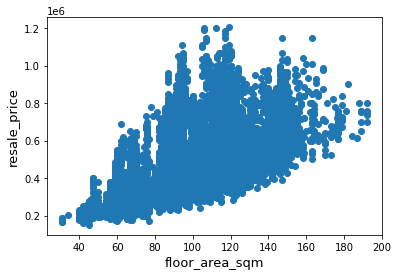

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = df['floor_area_sqm'], y = df['resale_price'])
plt.ylabel('resale_price', fontsize=13)
plt.xlabel('floor_area_sqm', fontsize=13)
plt.show()

# seems okay to me, nothing really screams outlier to me, let me check by flat_type then...

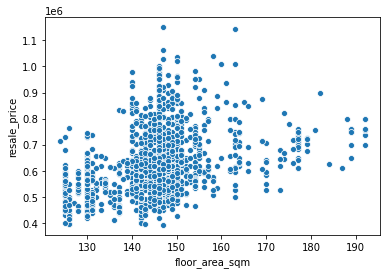

In [20]:
# sns.scatterplot(data=df[df['flat_type']=='MULTI-GENERATION'], x="floor_area_sqm", y="resale_price")
sns.scatterplot(data=df[df['flat_type']=='EXECUTIVE'], x="floor_area_sqm", y="resale_price")
# sns.scatterplot(data=df[df['flat_type']=='2 ROOM'], x="floor_area_sqm", y="resale_price")
# sns.scatterplot(data=df[df['flat_type']=='1 ROOM'], x="floor_area_sqm", y="resale_price")


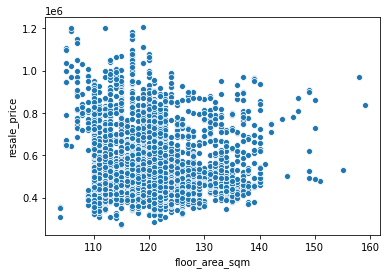

In [21]:
# sns.scatterplot(data=df[df['flat_type']=='3 ROOM'], x="floor_area_sqm", y="resale_price")
# sns.scatterplot(data=df[df['flat_type']=='4 ROOM'], x="floor_area_sqm", y="resale_price")
sns.scatterplot(data=df[df['flat_type']=='5 ROOM'], x="floor_area_sqm", y="resale_price")



 mu = 432137.91 and sigma = 153972.22



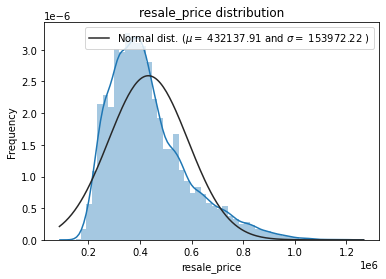

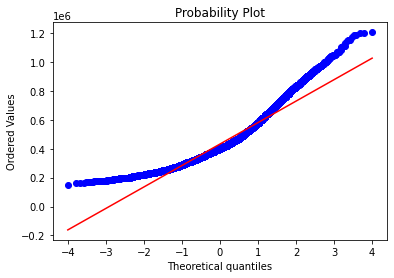

In [22]:
sns.distplot(df['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('resale_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['resale_price'], plot=plt)
plt.show()


 mu = 12.92 and sigma = 0.34



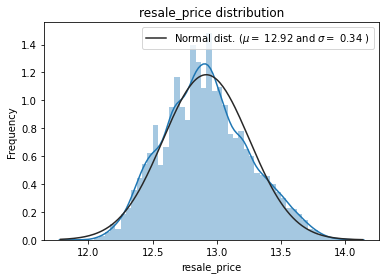

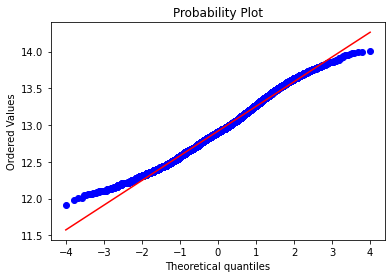

In [23]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["resale_price"] = np.log1p(df["resale_price"])

#Check the new distribution 
sns.distplot(df['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('resale_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['resale_price'], plot=plt)
plt.show()

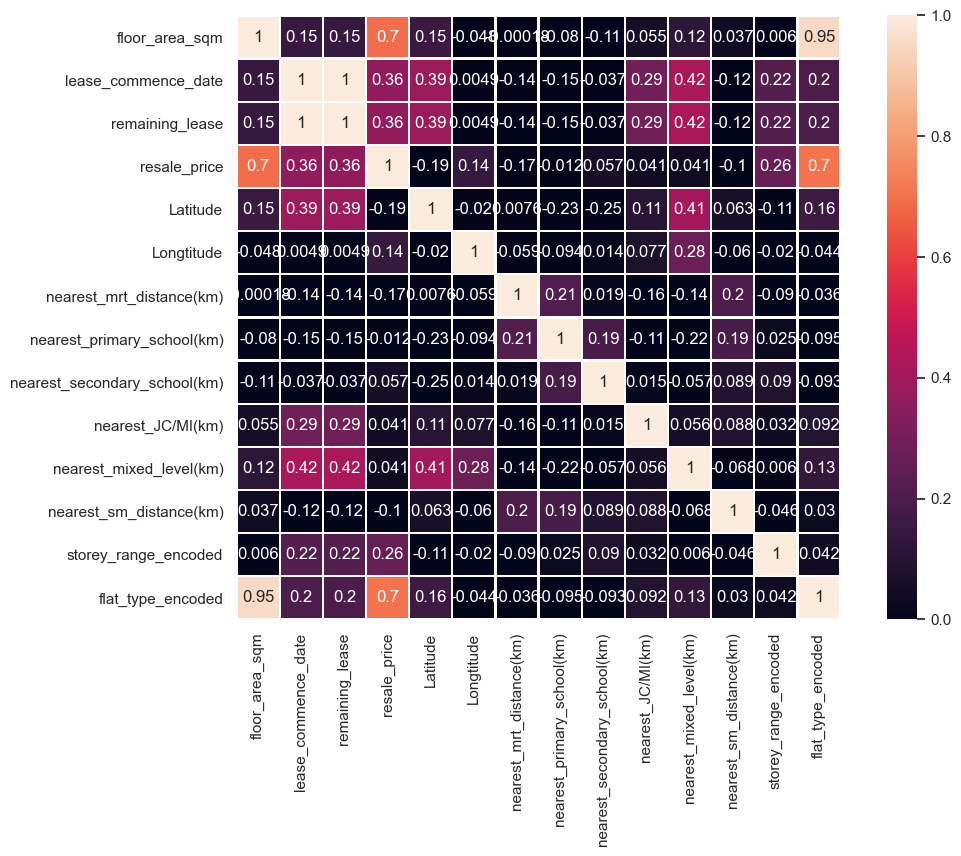

In [24]:

# Compute the correlation matrix
corr = df.corr()

sns.set(
    context     = 'notebook', 
    style       = 'white',
    palette     = 'deep',
    font        = 'sans-serif',
    font_scale  = 1,
    color_codes = True,
    rc          = {'figure.figsize':(12,8),
                   'figure.dpi': 100}
)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, square = True, vmin=0, vmax=1, annot=True, linewidths= 1, linecolor ='white')


In [25]:
df.sample()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Latitude,Longtitude,nearest_mrt,nearest_mrt_distance(km),nearest_primary_school,nearest_primary_school(km),nearest_secondary_school,nearest_secondary_school(km),nearest_JC/MI,nearest_JC/MI(km),nearest_mixed_level,nearest_mixed_level(km),nearest_sm,nearest_sm_distance(km),town_region,storey_range_encoded,flat_type_encoded
10856,BUKIT PANJANG,EXECUTIVE,10 TO 12,146.000,Maisonette,1988,68,13.400,1.374,103.769,PENDING LRT STATION,0.354,BUKIT PANJANG PRIMARY SCHOOL,0.080,ASSUMPTION PATHWAY SCHOOL,0.458,JURONG PIONEER JUNIOR COLLEGE,2.033,SINGAPORE SPORTS SCHOOL,6.225,NTUC Fairprice Co-operative Ltd,0.561,West,1,6


In [26]:
df1 = df.drop(columns =['storey_range','flat_type','nearest_mrt','nearest_primary_school','nearest_secondary_school','nearest_JC/MI','nearest_mixed_level','nearest_sm'])

In [27]:
df1.sample()

,town,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Latitude,Longtitude,nearest_mrt_distance(km),nearest_primary_school(km),nearest_secondary_school(km),nearest_JC/MI(km),nearest_mixed_level(km),nearest_sm_distance(km),town_region,storey_range_encoded,flat_type_encoded
20942,HOUGANG,60.000,Improved,1988,68,12.543,1.372,103.882,1.204,0.194,0.164,2.968,3.455,0.200,North_East,5,3


In [28]:

# Check the skew of all numerical features
skewed_feats = df1.skew()
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
floor_area_sqm,0.240
lease_commence_date,0.112
remaining_lease,0.112
resale_price,0.234
Latitude,0.064
Longtitude,-0.177
nearest_mrt_distance(km),1.076
nearest_primary_school(km),1.836
nearest_secondary_school(km),1.671
nearest_JC/MI(km),0.246


In [29]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df1[feat] = boxcox1p(df1[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 14 skewed numerical features to Box Cox transform


In [30]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [31]:
X = df1.drop(columns = ['resale_price'])
y = df1['resale_price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [33]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [34]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [35]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [36]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [37]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [38]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [39]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [42]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: nan (nan)



array([nan, nan, nan, nan, nan])

In [41]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: nan (nan)

